In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
pwd

'/Users/maxwell/Documents/CMU/Courses/Mini 5/ML Capstone/ML-Capstone/Code'

In [21]:
data = pd.read_csv('../data/train_weekly.csv')
test_data = pd.read_csv('../data/test_weekly.csv')
data.Time = pd.to_datetime(data.Time)
test_data.Time = pd.to_datetime(test_data.Time)
# data = data.iloc[::-1].reset_index(drop = True)
# test_data = test_data.iloc[::-1].reset_index(drop = True)

In [22]:
data.drop(['Unnamed: 0'], axis = 1, inplace=True)
test_data.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [23]:
data.columns

Index(['Time', 'AM_NetPos', 'FedFunds', '1Y OIS', 'Libor 3 mo', 'Libor 6 mo',
       'Libor 1Y', 'T10Y3M', 'T10Y2Y', 'T10YIE', 'JNK_Price', 'SPX',
       'WILL5000INDFC', 'NASDAQCOM', 'GOLD_price', 'VIX', 'VXVCLS', 'GVZCLS',
       'JPY', 'EUR', 'USDX_Close', 'DTWEXBGS', 'FF_Mkt', 'FF_SMB', 'FF_HML',
       'FF_MOM', 'Signal', 'Lev_NetPos', 'AM_n_L', 'AM_n_S', 'Lev_n_L',
       'Lev_n_S', 'AM_L', 'AM_S', 'Lev_L', 'Lev_S', 'SPY Flows', 'IVV',
       'JNK_Volume', 'Flag'],
      dtype='object')

In [24]:
test_data.columns

Index(['Time', 'AM_NetPos', 'FedFunds', '1Y OIS', 'Libor 3 mo', 'Libor 6 mo',
       'Libor 1Y', 'T10Y3M', 'T10Y2Y', 'T10YIE', 'JNK_Price', 'SPX',
       'WILL5000INDFC', 'NASDAQCOM', 'GOLD_price', 'VIX', 'VXVCLS', 'GVZCLS',
       'JPY', 'EUR', 'USDX_Close', 'DTWEXBGS', 'FF_Mkt', 'FF_SMB', 'FF_HML',
       'FF_MOM', 'Signal', 'Lev_NetPos', 'AM_n_L', 'AM_n_S', 'Lev_n_L',
       'Lev_n_S', 'AM_L', 'AM_S', 'Lev_L', 'Lev_S', 'SPY Flows', 'IVV',
       'JNK_Volume', 'Flag'],
      dtype='object')

<AxesSubplot:>

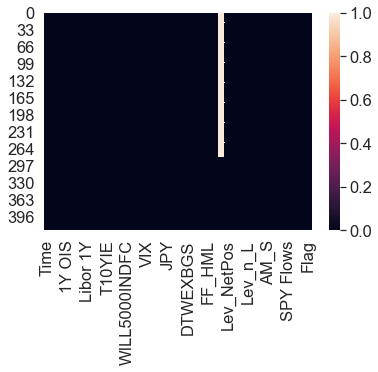

In [25]:
sns.heatmap(data.isnull())

In [26]:
data.drop(['Signal', 'Lev_NetPos', 'Flag'], axis = 1, inplace = True)
test_data.drop(['Signal', 'Lev_NetPos', 'Flag'], axis = 1, inplace = True)

## Study Positioning Dynamics

In [27]:
data['dNetPos'] = data['AM_NetPos'].diff()
test_data['dNetPos'] = test_data['AM_NetPos'].diff()
data['dNetPos_log_rate'] = np.log(data['AM_NetPos']).diff() 
test_data['dNetPos_log_rate'] = np.log(test_data['AM_NetPos']).diff()

In [28]:
data = data.dropna().reset_index(drop = True)
test_data = test_data.dropna().reset_index(drop = True)

In [29]:
data.columns

Index(['Time', 'AM_NetPos', 'FedFunds', '1Y OIS', 'Libor 3 mo', 'Libor 6 mo',
       'Libor 1Y', 'T10Y3M', 'T10Y2Y', 'T10YIE', 'JNK_Price', 'SPX',
       'WILL5000INDFC', 'NASDAQCOM', 'GOLD_price', 'VIX', 'VXVCLS', 'GVZCLS',
       'JPY', 'EUR', 'USDX_Close', 'DTWEXBGS', 'FF_Mkt', 'FF_SMB', 'FF_HML',
       'FF_MOM', 'AM_n_L', 'AM_n_S', 'Lev_n_L', 'Lev_n_S', 'AM_L', 'AM_S',
       'Lev_L', 'Lev_S', 'SPY Flows', 'IVV', 'JNK_Volume', 'dNetPos',
       'dNetPos_log_rate'],
      dtype='object')

In [30]:
p = len(data.columns)
p

39

In [31]:
# For training purpose
time_periods = data['Time']
X_train = data.iloc[:,2:p-2]
y_train = data.iloc[:,-2]
y_train_gr = data.iloc[:,-1]
#y_train_alter = weekly_data.iloc[:,2]
X_test = test_data.iloc[:,2:p-2]
y_test = test_data.iloc[:,-2]
y_test_gr = test_data.iloc[:,-1]
#y_test_alter = test_weekly_data.iloc[:,2]

In [32]:
data['year'] = pd.DatetimeIndex(data['Time']).year

In [33]:
data.columns

Index(['Time', 'AM_NetPos', 'FedFunds', '1Y OIS', 'Libor 3 mo', 'Libor 6 mo',
       'Libor 1Y', 'T10Y3M', 'T10Y2Y', 'T10YIE', 'JNK_Price', 'SPX',
       'WILL5000INDFC', 'NASDAQCOM', 'GOLD_price', 'VIX', 'VXVCLS', 'GVZCLS',
       'JPY', 'EUR', 'USDX_Close', 'DTWEXBGS', 'FF_Mkt', 'FF_SMB', 'FF_HML',
       'FF_MOM', 'AM_n_L', 'AM_n_S', 'Lev_n_L', 'Lev_n_S', 'AM_L', 'AM_S',
       'Lev_L', 'Lev_S', 'SPY Flows', 'IVV', 'JNK_Volume', 'dNetPos',
       'dNetPos_log_rate', 'year'],
      dtype='object')

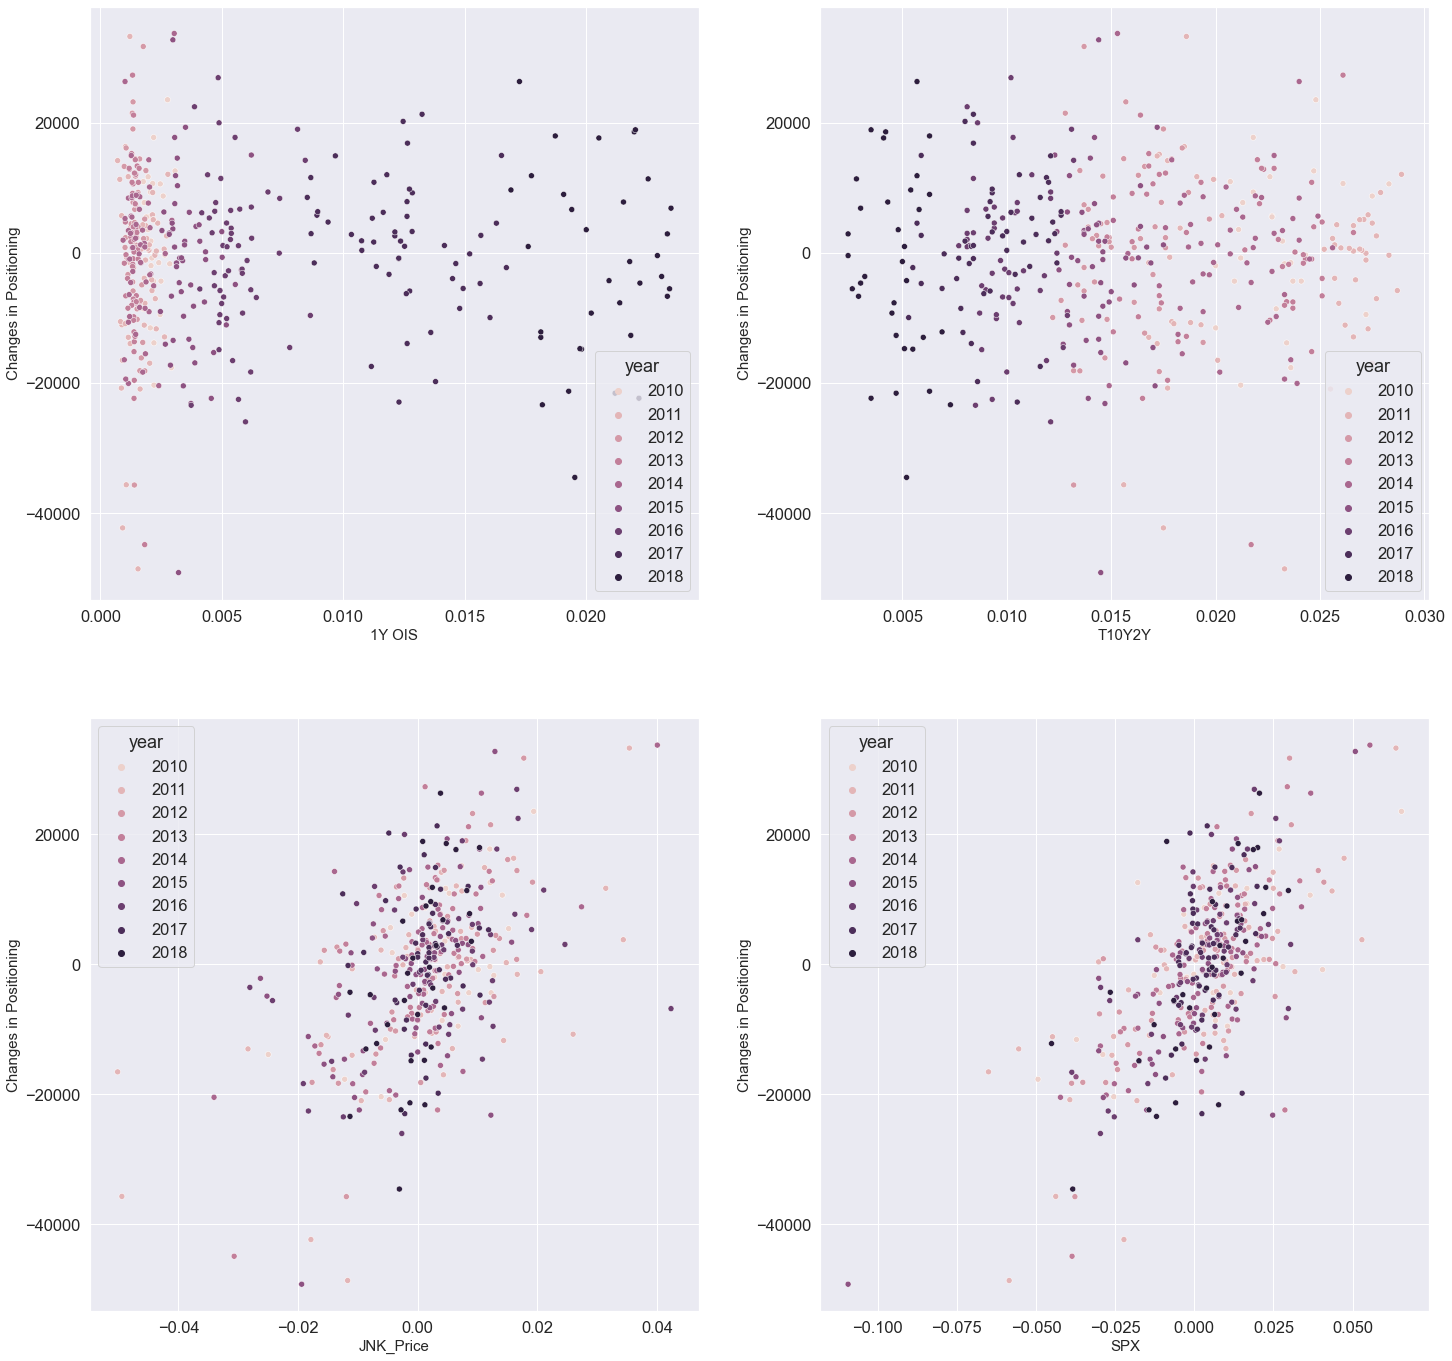

In [34]:
fig = plt.figure(figsize = (24,24))
sns.set(font_scale = 1.5)
axs = fig.subplots(2,2)
picklst = [3, 8, 10, 11]
for i in range(4):
    sns.scatterplot(x=data.iloc[:,picklst[i]], y=data.iloc[:,-3], data=data, hue="year",legend="full", ax=axs[i//2,i%2])
    axs[i//2, i%2].set_ylabel("Changes in Positioning", fontsize = 15)
    axs[i//2, i%2].set_xlabel(data.columns[picklst[i]], fontsize = 15)

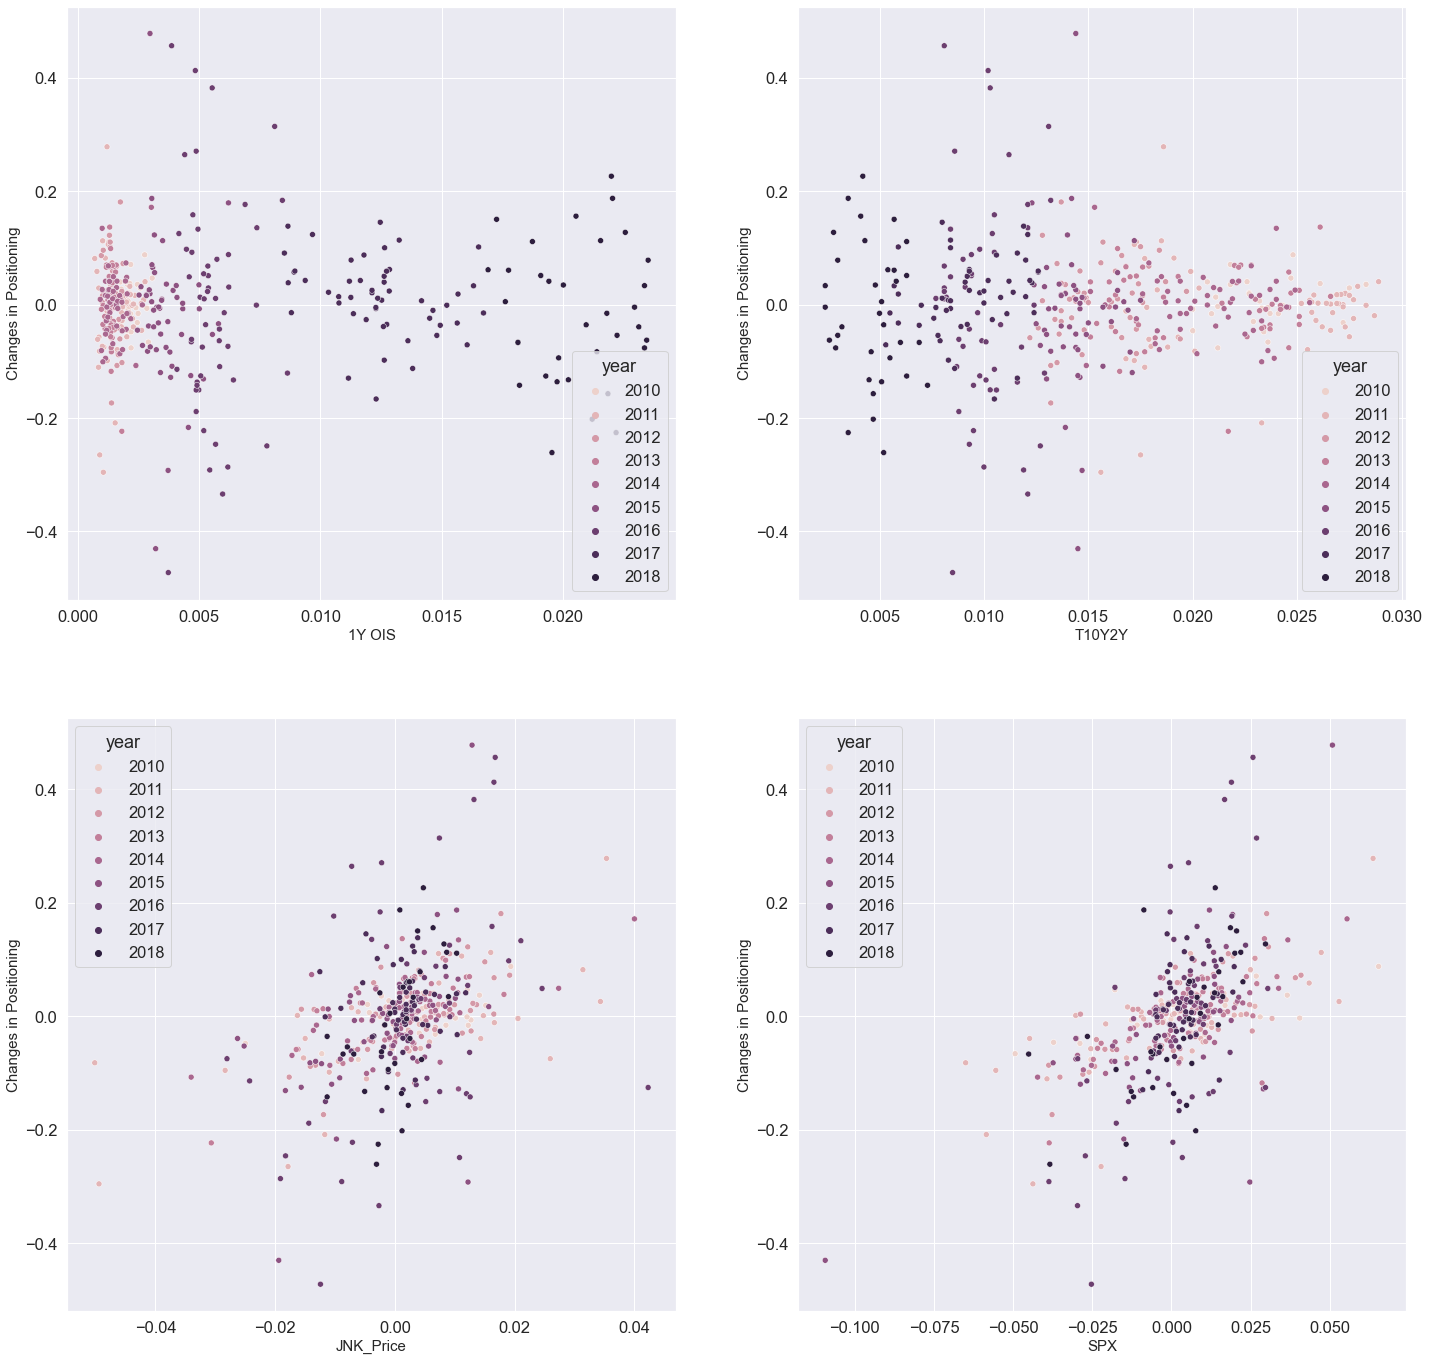

In [35]:
fig = plt.figure(figsize = (24,24))
sns.set(font_scale = 1.5)
axs = fig.subplots(2,2)
picklst = [3, 8, 10, 11]
for i in range(4):
    sns.scatterplot(x=data.iloc[:,picklst[i]], y=data.iloc[:,-2], data=data, hue="year",legend="full", ax=axs[i//2,i%2])
    axs[i//2, i%2].set_ylabel("Changes in Positioning", fontsize = 15)
    axs[i//2, i%2].set_xlabel(data.columns[picklst[i]], fontsize = 15)

### Modeling

For starters, we want to try some basic regression-based model: ridge, lasso, GAM.

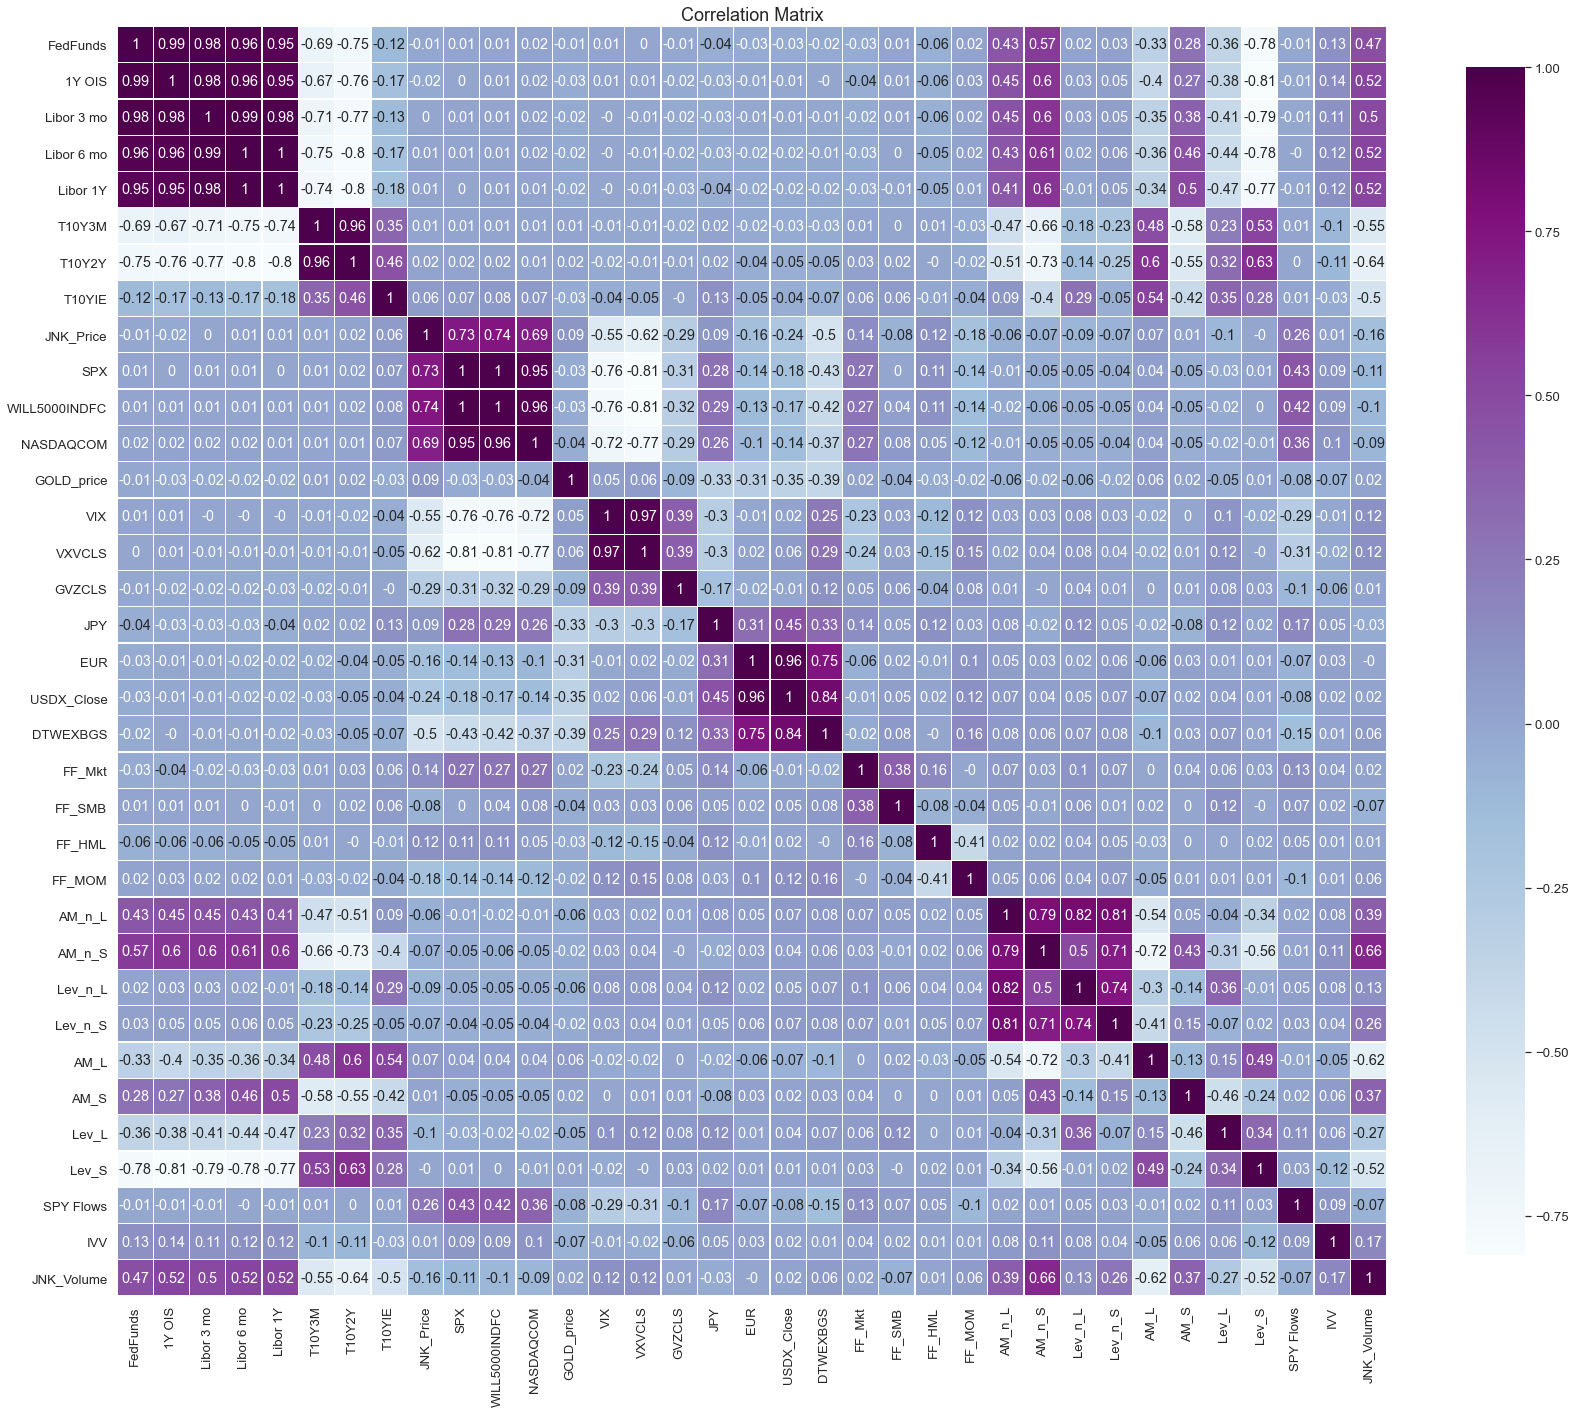

In [36]:
sns.set(font_scale = 1.2)
f, ax = plt.subplots(figsize=(24, 24))
ax = sns.heatmap(np.around(X_train.corr(),2), square=True,linewidths=.3,annot=True,cbar_kws={"shrink": .7}, cmap="BuPu")
plt.tight_layout()
plt.title('Correlation Matrix',size=18)
plt.show()

#### Standardization

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [119]:
benchmark_res = pd.DataFrame(index = ['Ridge', 'Lasso', 'Random Forest'], columns = ['MSE', 'MAE'])

#### Ridge

In [120]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [121]:
ridge = RidgeCV(alphas = np.linspace(0.1,1,100))
ridge.fit(X_train_std, y_train)

RidgeCV(alphas=array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.33636364, 0.34545455, 0.35454545, 0.36363636,
       0.37272727, 0.381818...
       0.69090909, 0.7       , 0.70909091, 0.71818182, 0.72727273,
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272727,
       0.78181818, 0.79090909, 0.8       , 0.80909091, 0.81818182,
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ]))

In [122]:
ridge.alpha_

0.609090909090909

In [123]:
benchmark_res.loc['Ridge', 'MSE'] = mean_squared_error(y_test, ridge.predict(X_test_std))

In [124]:
benchmark_res.loc['Ridge', 'MAE'] =  mean_absolute_error(y_test, ridge.predict(X_test_std))

In [125]:
# alpha_range = ridge.alphas_
# mse_values = ridge.mse_path_.mean(axis = 1)
# sd_values = ridge.mse_path_.std(axis = 1)

# plt.plot(np.log(alpha_range), mse_values ,"k-o")
# plt.plot(np.log(alpha_range), mse_values + sd_values,"r--")
# plt.plot(np.log(alpha_range), mse_values - sd_values,"r--")
# plt.fill_between(np.log(alpha_range),
#                 mse_values + sd_values,
#                 mse_values - sd_values, alpha = .2)

# plt.plot([np.log(ridge.alpha_)]*2, [0,.000045])
# plt.xlabel(r"$log(\alpha)$")
# plt.ylabel("10-Fold CV MSE");

#### Lasso

In [126]:
lasso = LassoCV(max_iter = 10000)
lasso.fit(X_train_std, y_train)

LassoCV(max_iter=10000)

In [127]:
np.log(lasso.alpha_)

6.571341905679263

In [128]:
benchmark_res.loc['Lasso', 'MSE'] = mean_squared_error(y_test, lasso.predict(X_test_std))

In [129]:
benchmark_res.loc['Lasso', 'MAE'] = mean_absolute_error(y_test, lasso.predict(X_test_std))

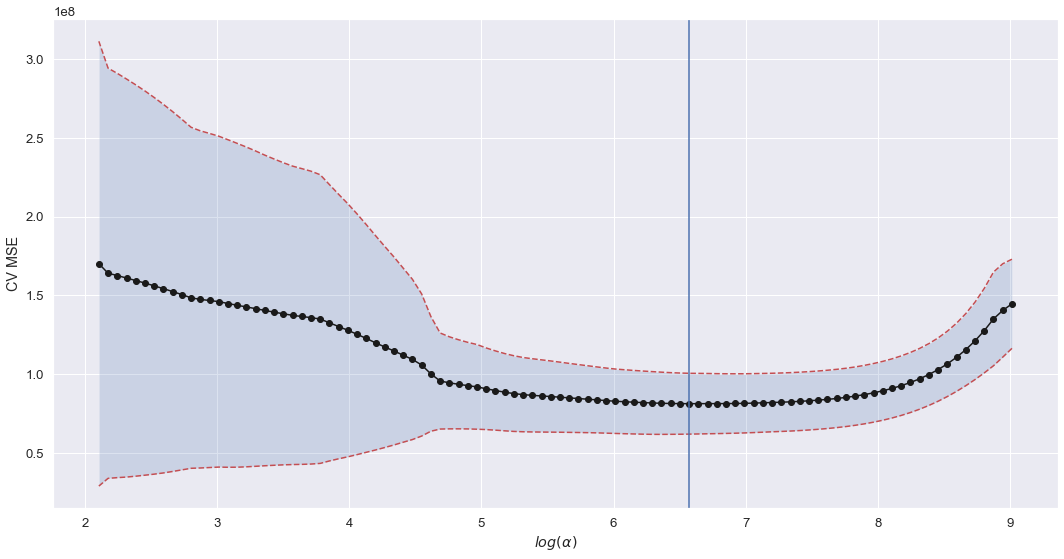

In [130]:
alpha_range = lasso.alphas_
mse_values = lasso.mse_path_.mean(axis = 1)
sd_values = lasso.mse_path_.std(axis = 1)
plt.figure(figsize = [18,9])
plt.plot(np.log(alpha_range), mse_values ,"ko-")
plt.plot(np.log(alpha_range), mse_values + sd_values,"r--")
plt.plot(np.log(alpha_range), mse_values - sd_values,"r--")
plt.fill_between(np.log(alpha_range),
                mse_values + sd_values,
                mse_values - sd_values, alpha = .2)

plt.axvline(np.log(lasso.alpha_))
plt.xlabel(r"$log(\alpha)$")
plt.ylabel("CV MSE");

__Useful variables selected by LASSO__

In [131]:
X_train.columns[np.abs(lasso.coef_ - 0) > 1e-4]

Index(['SPX', 'GOLD_price', 'EUR', 'FF_SMB', 'AM_L', 'SPY Flows',
       'JNK_Volume'],
      dtype='object')

#### RandomForest

In [132]:
X_train.shape

(423, 35)

In [133]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 20)
rf.fit(X_train_std, y_train)

RandomForestRegressor(n_estimators=20)

In [134]:
benchmark_res.loc['Random Forest', 'MSE'] = mean_squared_error(y_test, rf.predict(X_test_std))

In [135]:
benchmark_res.loc['Random Forest', 'MAE'] = mean_absolute_error(y_test, rf.predict(X_test_std))

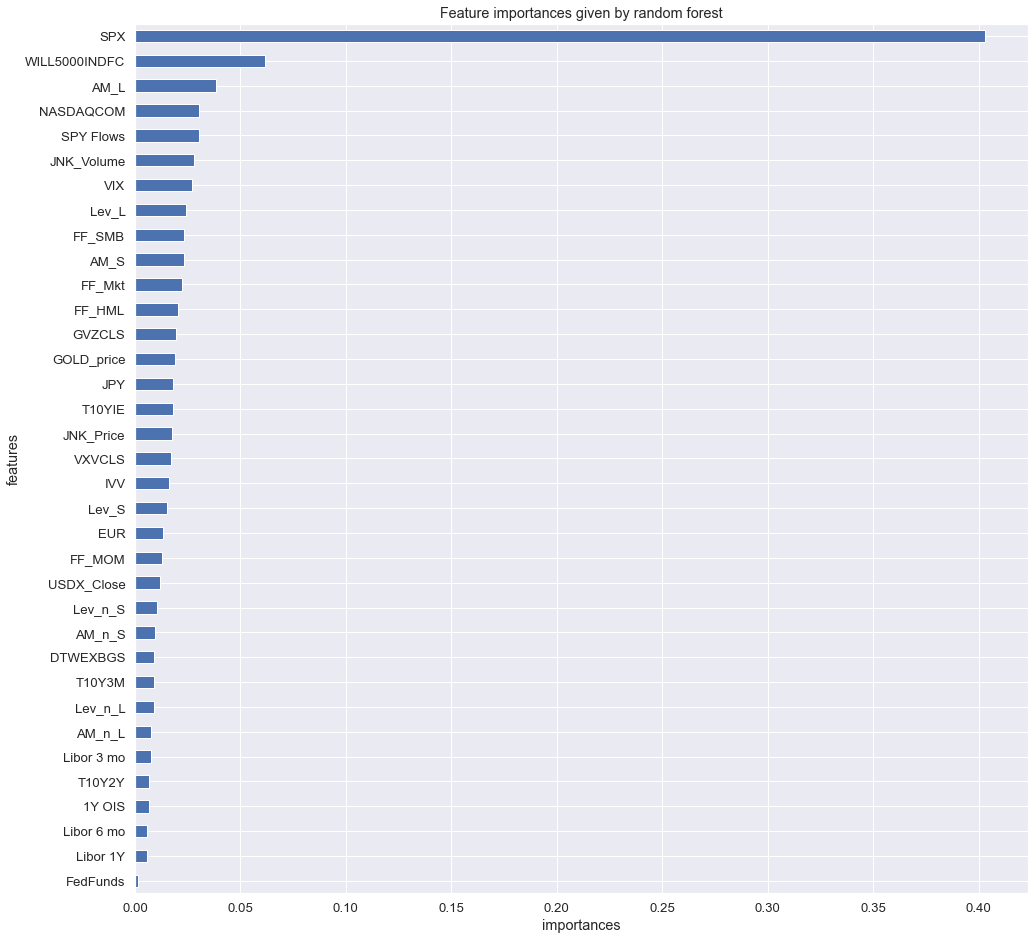

In [136]:
feat_importance = pd.Series(rf.feature_importances_, index = X_train.columns)
fis = np.argsort(feat_importance)
feat_importance = feat_importance[fis]
fig = plt.figure(figsize = [16,16])
ax = fig.subplots(1,1)
feat_importance.plot(kind = 'barh', ax = ax)
plt.ylabel('features')
plt.xlabel('importances')
plt.title("Feature importances given by random forest")
plt.show()

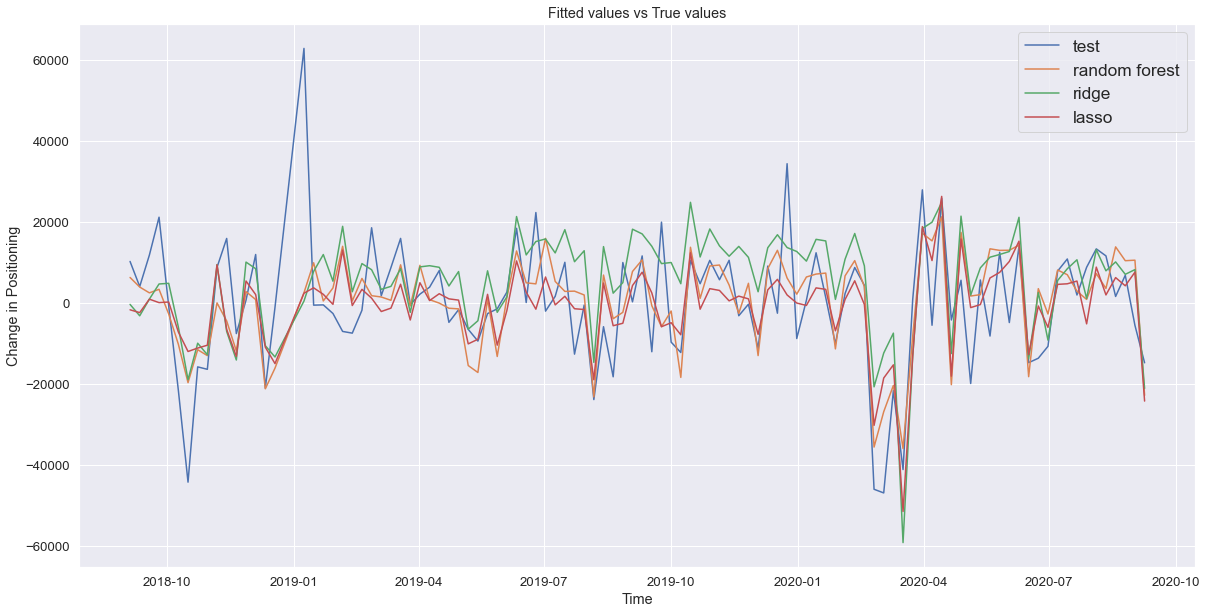

In [137]:
fig = plt.figure(figsize = [20,10])
plt.plot(test_data['Time'], y_test, label = 'test')
plt.plot(test_data['Time'], rf.predict(X_test_std), label = 'random forest')
plt.plot(test_data['Time'], ridge.predict(X_test_std), label = 'ridge')
plt.plot(test_data['Time'], lasso.predict(X_test_std), label = 'lasso')
plt.xlabel("Time")
plt.ylabel("Change in Positioning")
plt.title('Fitted values vs True values')
plt.legend(fontsize = 'large')

In [138]:
benchmark_res

,MSE,MAE
Ridge,1.99113e+08,10976.1
Lasso,1.50844e+08,8906.67
Random Forest,1.44091e+08,8579.04
